In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style="white")

In [2]:
df = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
df.shape

(58645, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [6]:
cate_cols = df.select_dtypes(include='object').columns
print('Catgorical columns:', cate_cols)

Catgorical columns: Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


In [7]:
missing_val = df.isnull().sum()
missing_val = missing_val[missing_val > 0]

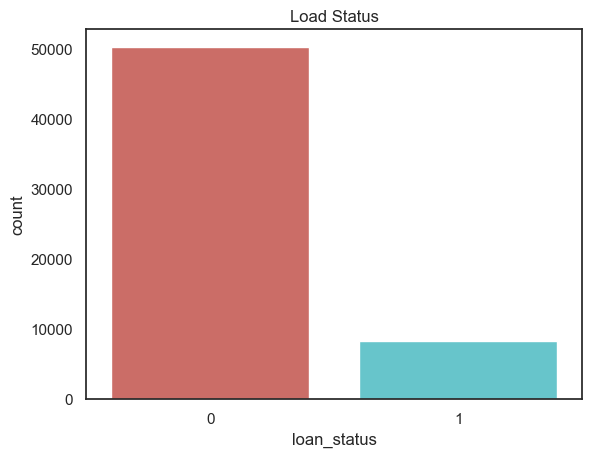

In [11]:
sns.countplot(x='loan_status',data=df,palette='hls')
plt.title('Load Status')
plt.show()

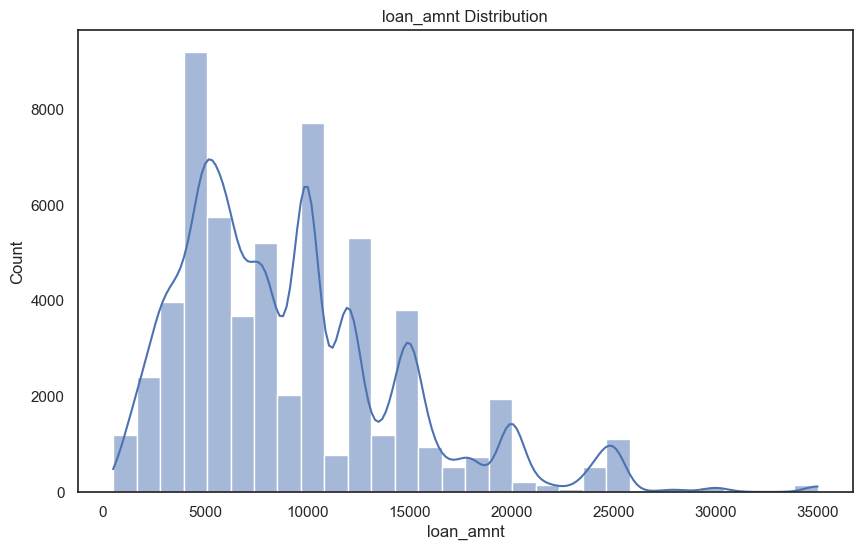

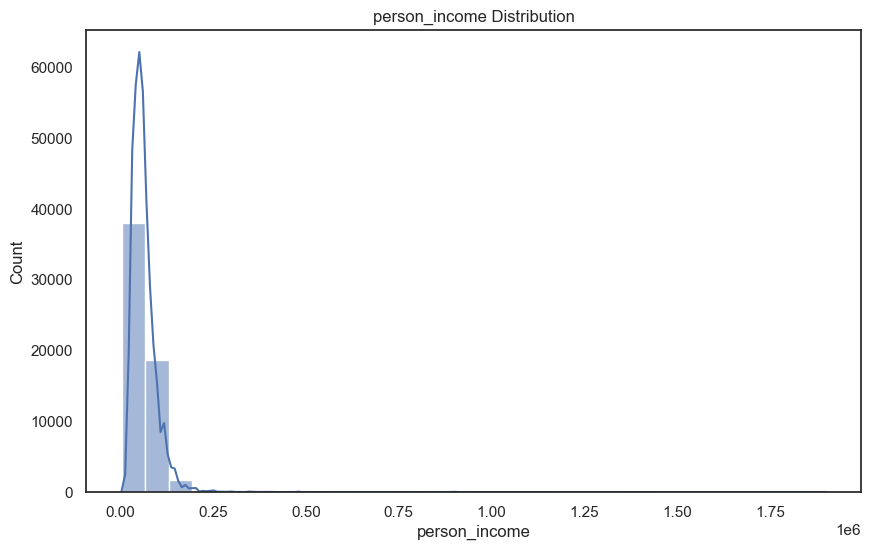

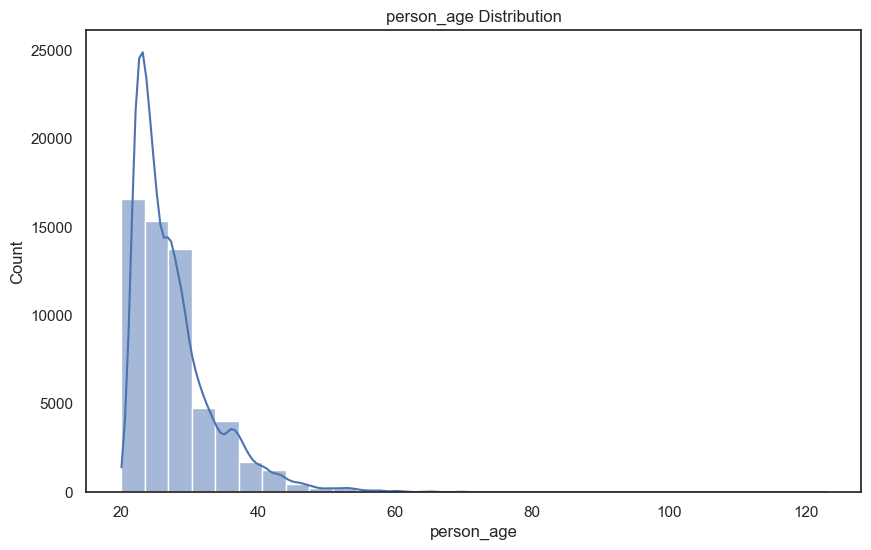

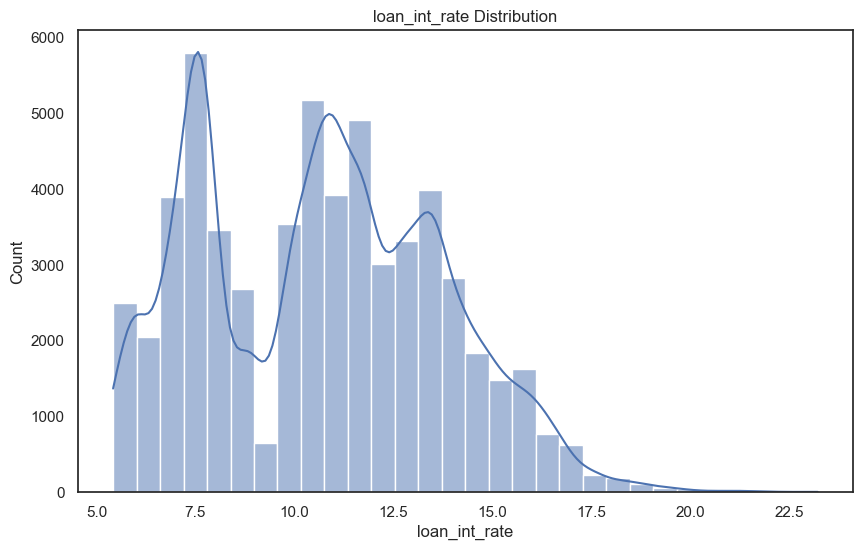

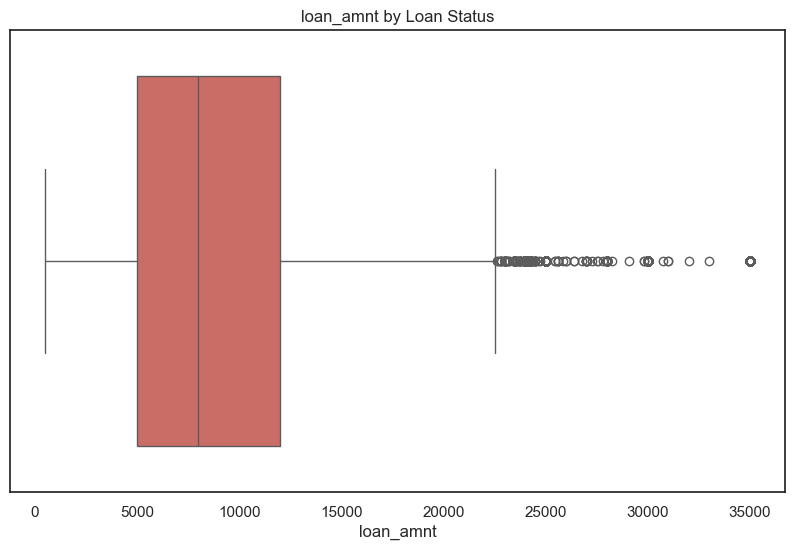

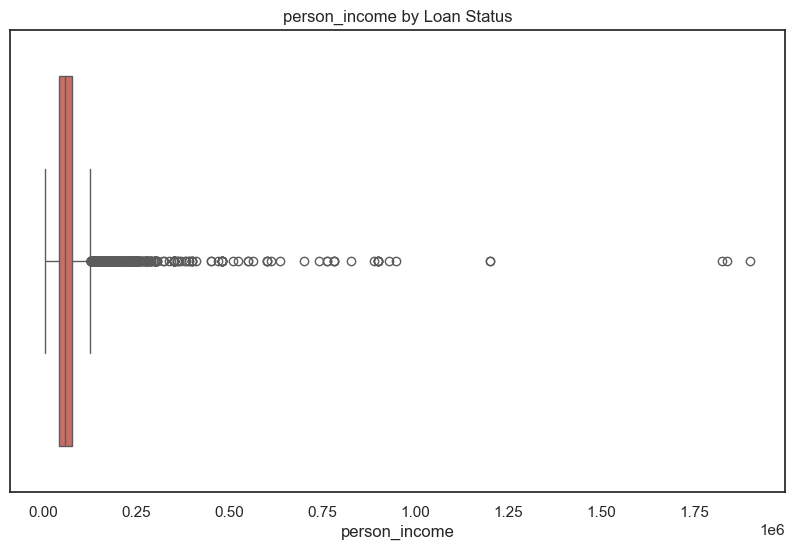

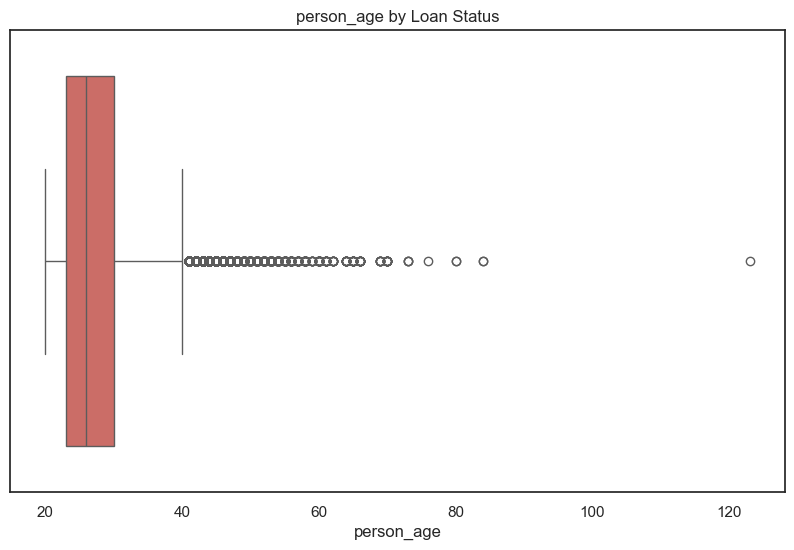

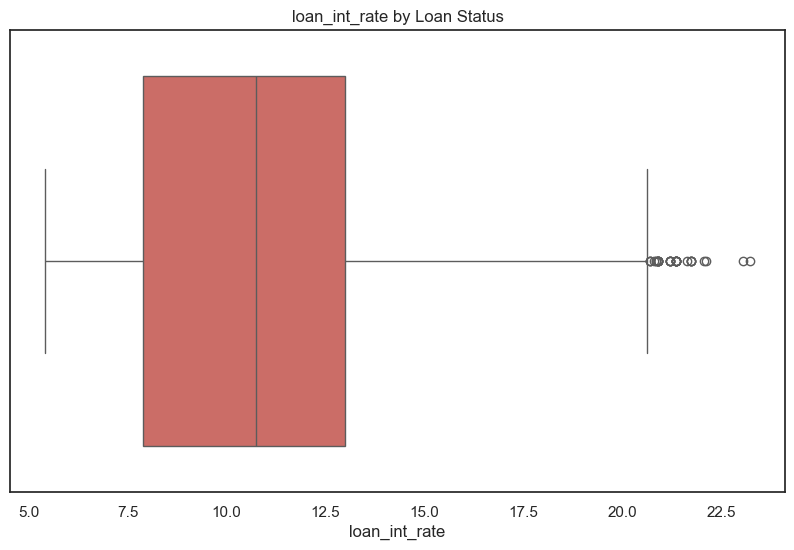

In [13]:
numerical_cols = ['loan_amnt', 'person_income', 'person_age', 'loan_int_rate']

for col in numerical_cols:
	plt.figure(figsize=(10,6))
	sns.histplot(df[col].dropna(), kde=True, bins=30, palette='hls')
	plt.title(f'{col} Distribution')
	plt.show()

for col in numerical_cols:
	plt.figure(figsize=(10,6))
	sns.boxplot(x=df[col],palette='hls')
	plt.title(f'{col} by Loan Status')
	plt.show()

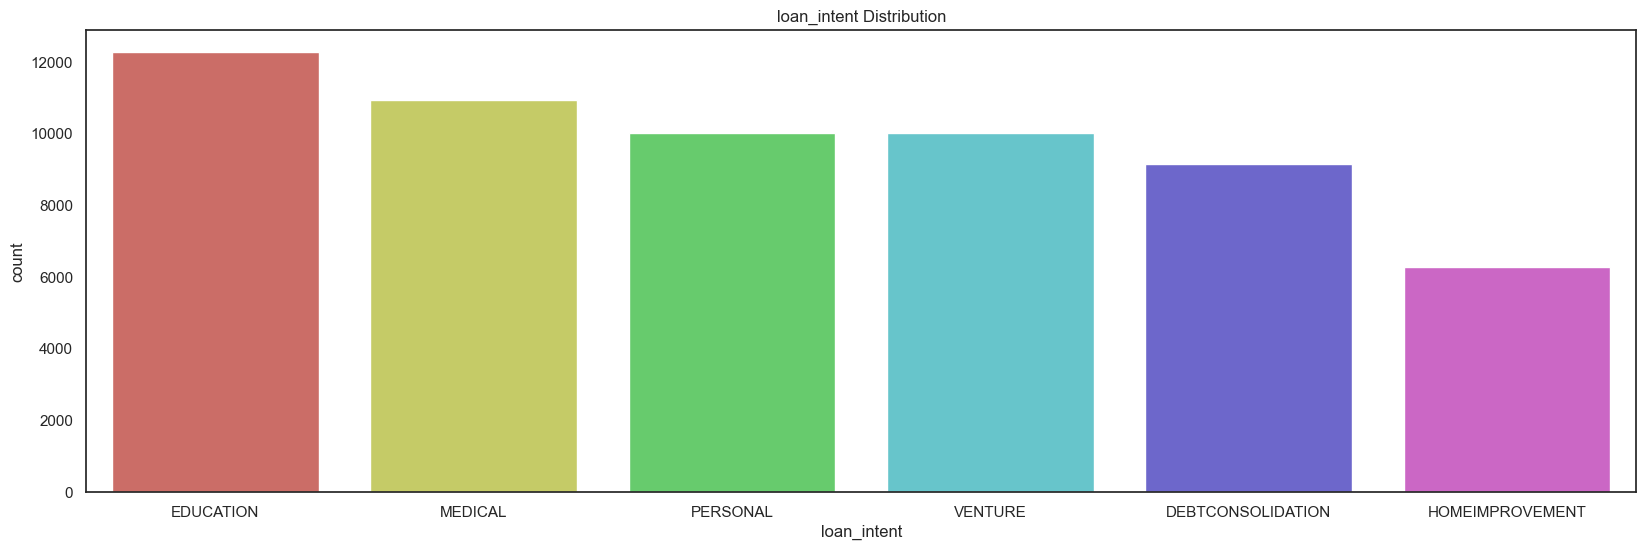

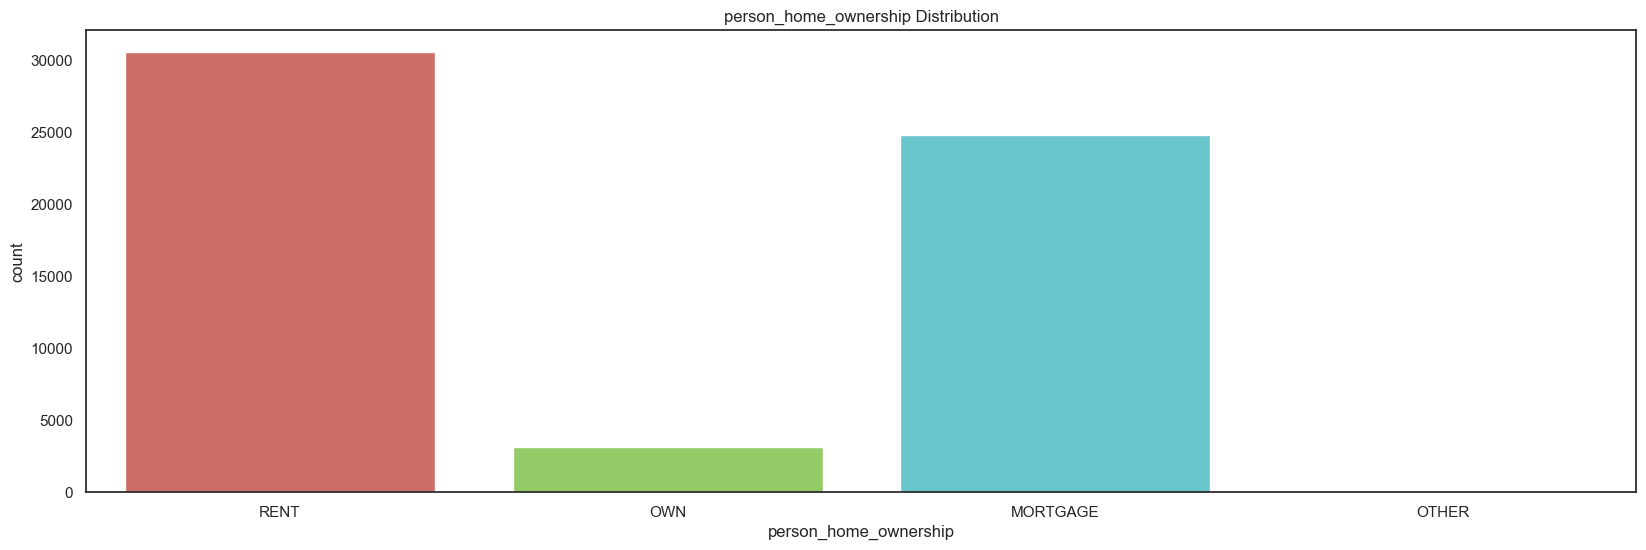

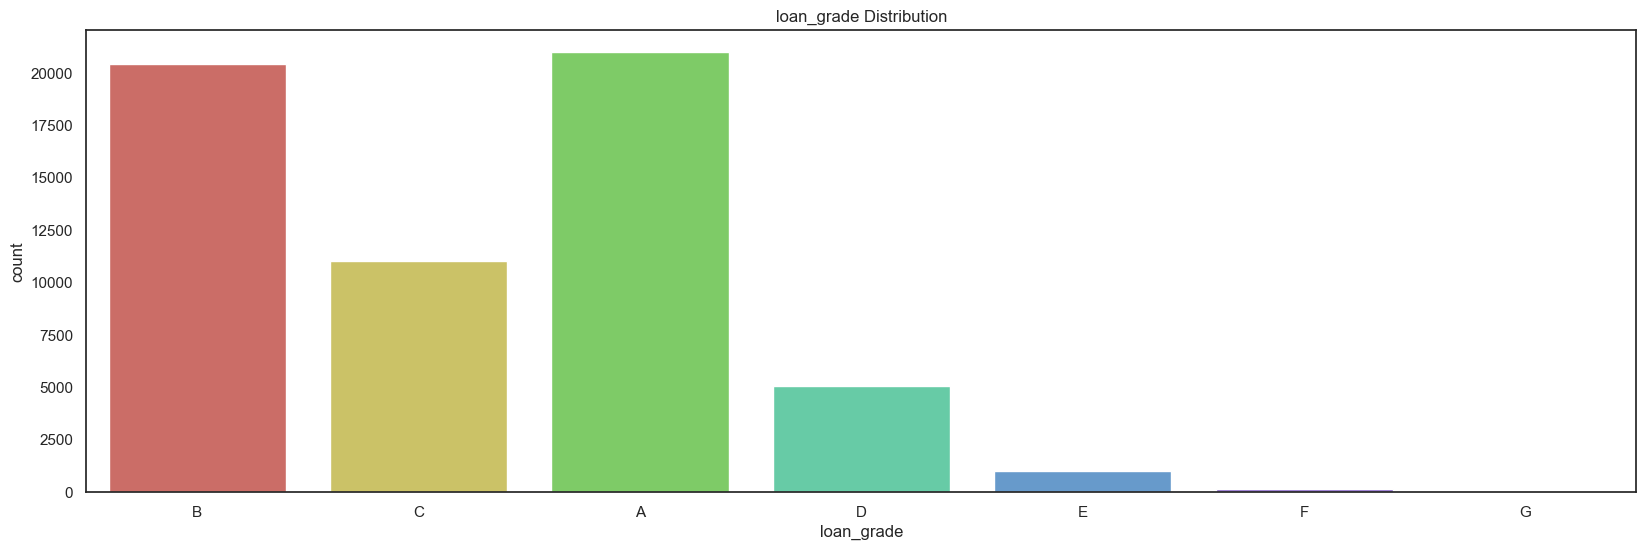

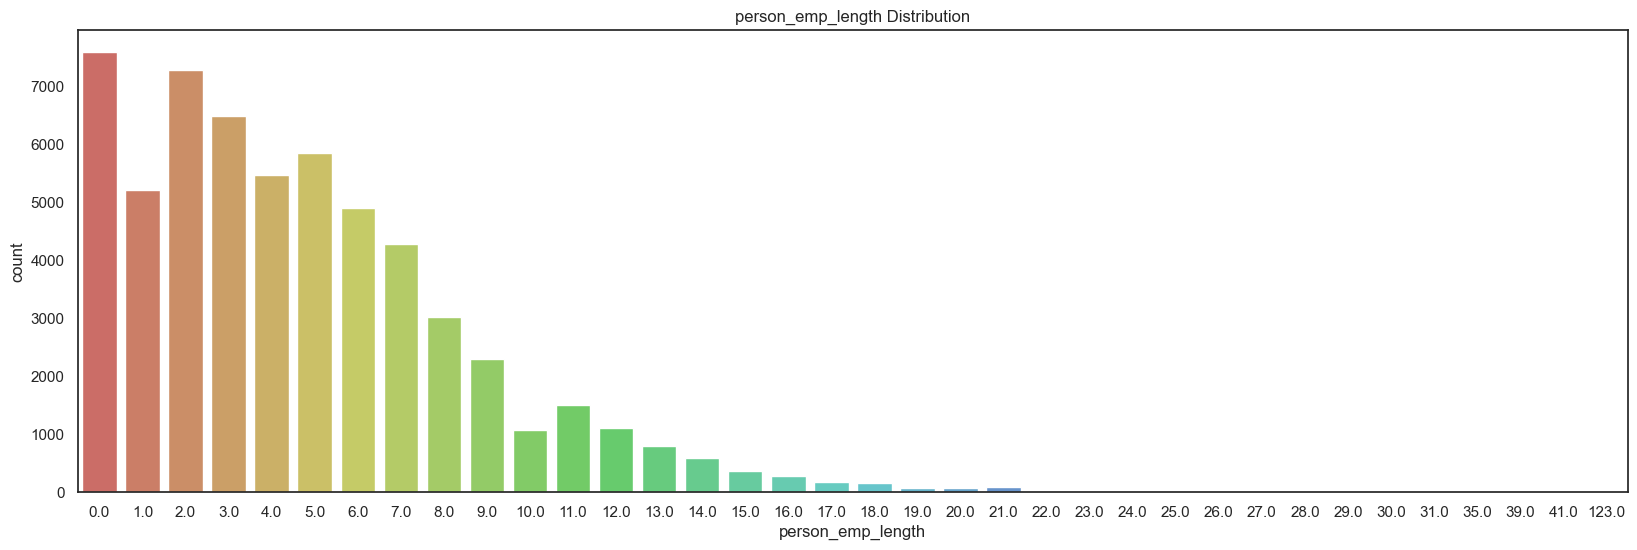

In [14]:
categroical_cols = ['loan_intent', 'person_home_ownership', 'loan_grade', 'person_emp_length']

for col in categroical_cols:
	plt.figure(figsize=(20,6))
	sns.countplot(x=col, data=df, palette='hls')
	plt.title(f'{col} Distribution')
	plt.show()

## relations between target and features

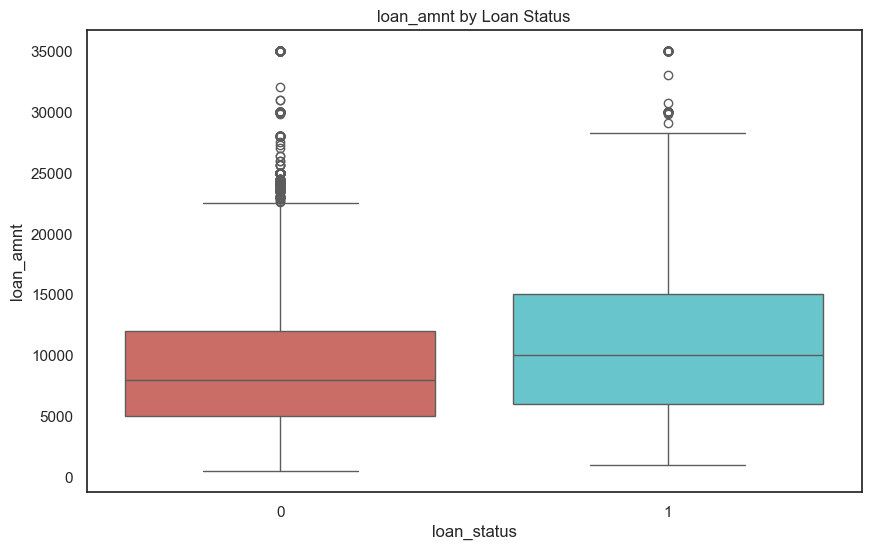

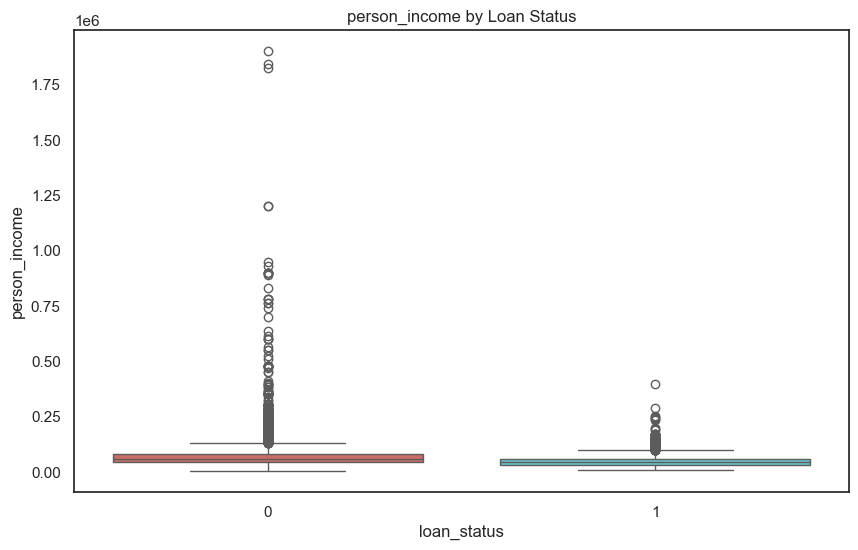

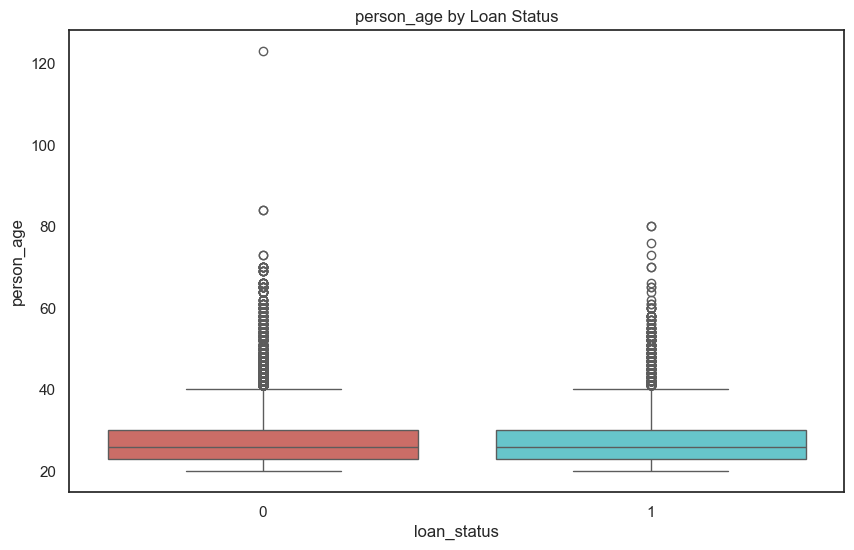

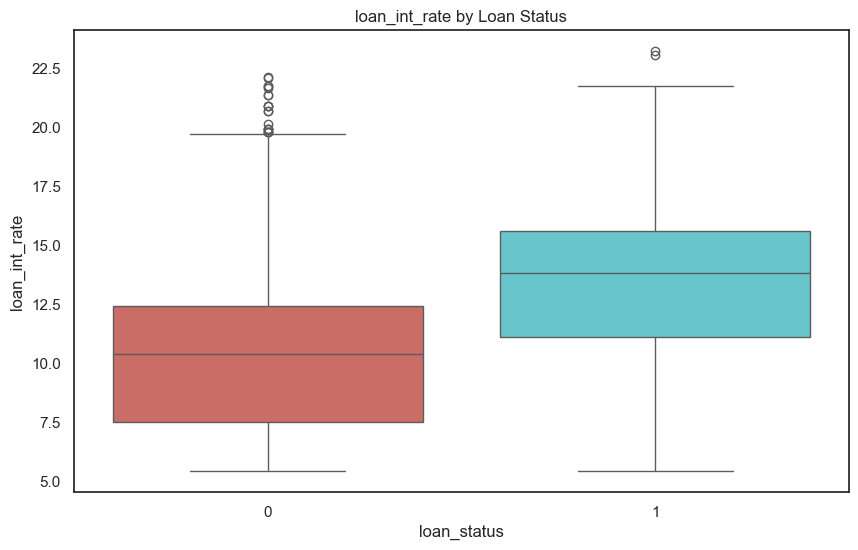

In [15]:
for col in numerical_cols:
	plt.figure(figsize=(10,6))
	sns.boxplot(x='loan_status', y=col, data=df, palette='hls')
	plt.title(f'{col} by Loan Status')
	plt.show()

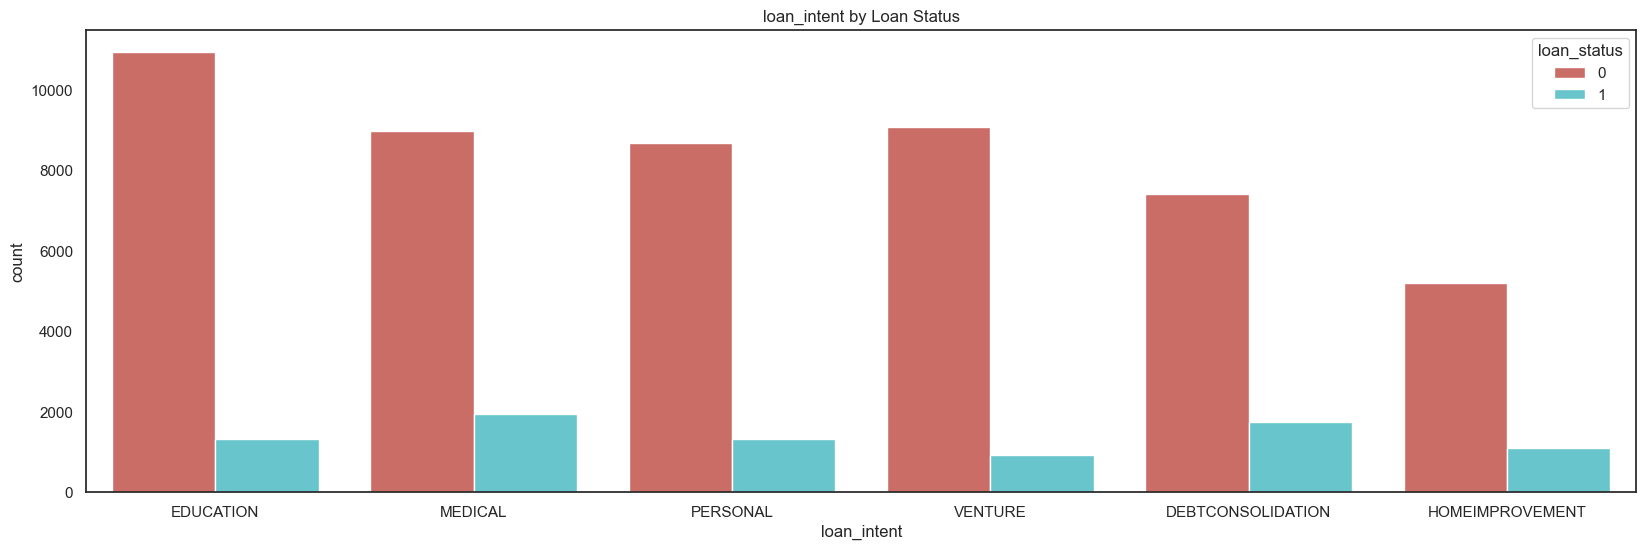

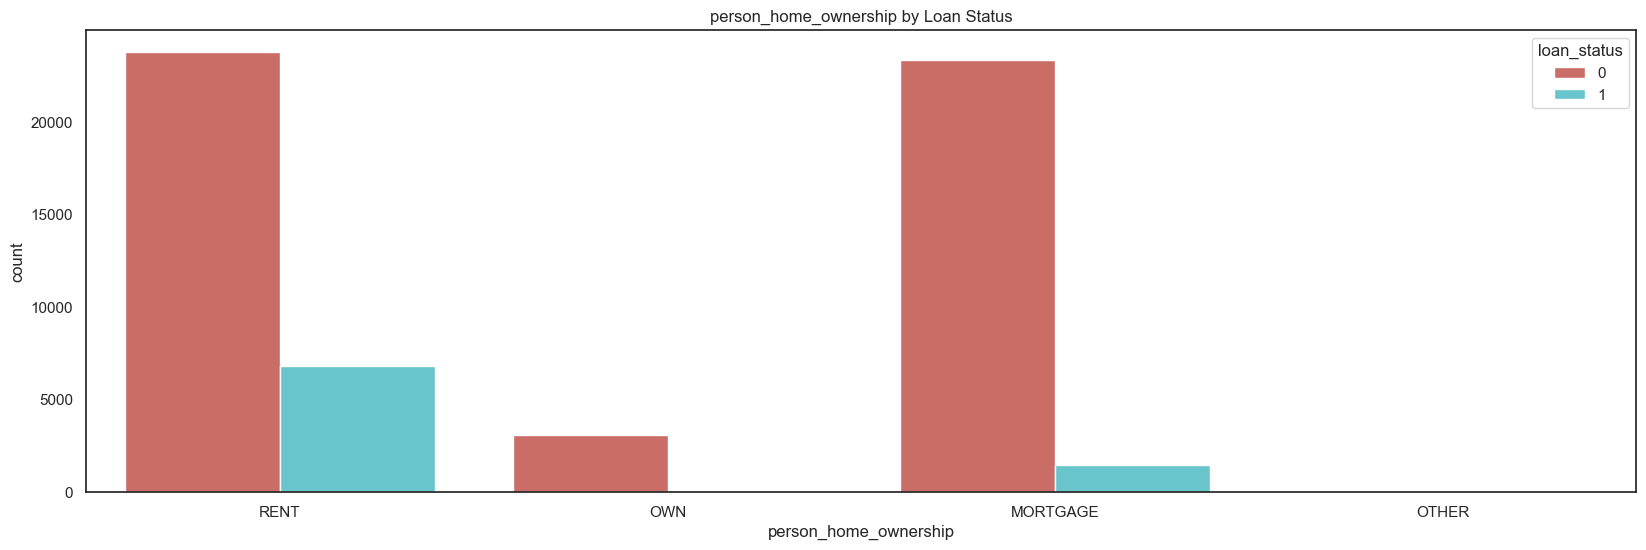

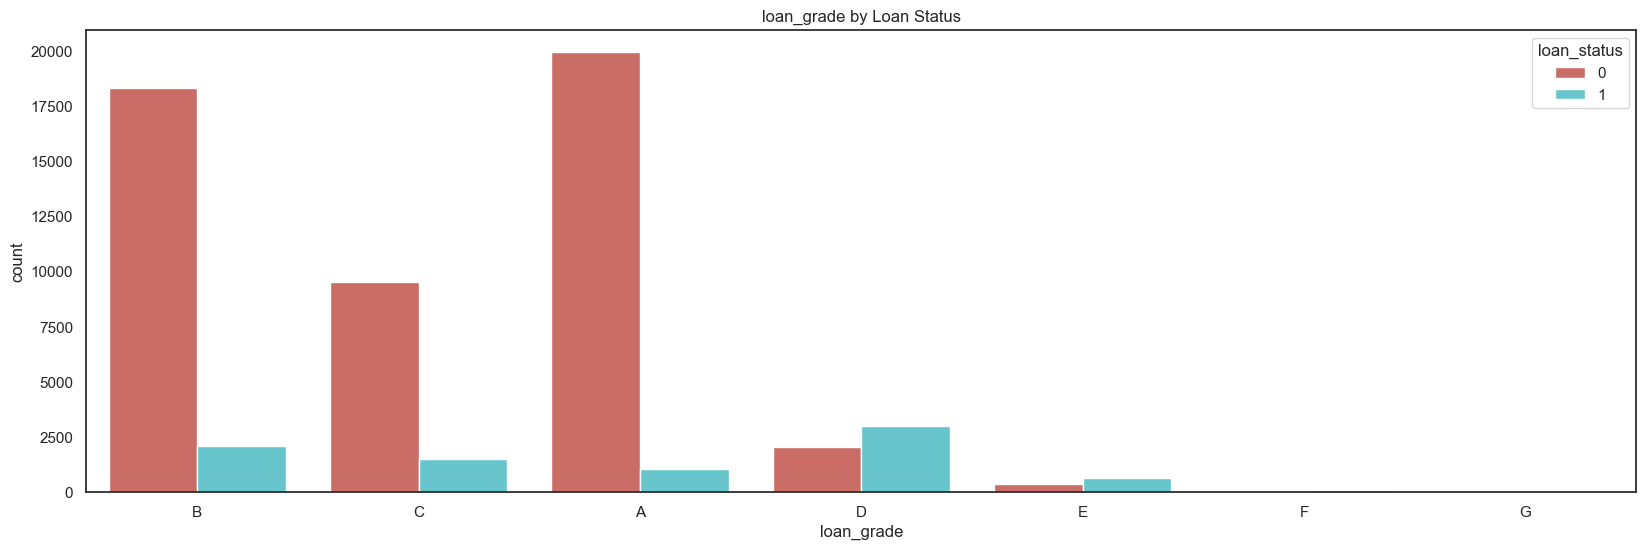

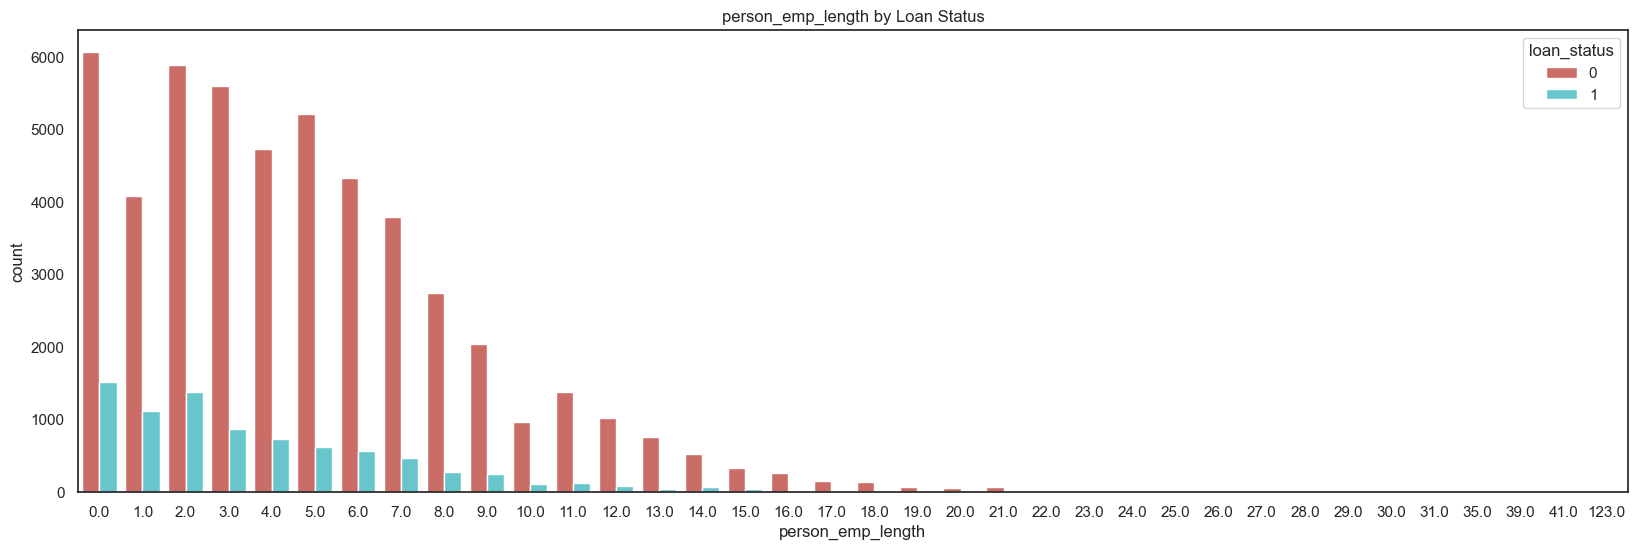

In [16]:
for col in categroical_cols:
	plt.figure(figsize=(20,6))
	sns.countplot(x=col, hue='loan_status', data=df, palette='hls')
	plt.title(f'{col} by Loan Status')
	plt.show()